In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [3]:
philly_users = pd.read_feather('user_philly.feather')

In [4]:
philly_users

,index,_id,user_id,name,review_count,yelping_since,useful,funny,cool,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,4,631ea1f7abab926ea88770d7,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",...,264,184,157,251,1847,7054,3131,3131,1521,1946
1,6,631ea1f7abab926ea88770d9,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,,...,0,0,0,0,1,6,3,3,0,0
2,12,631ea1f7abab926ea88770df,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26 16:11:11,18,3,13,,...,0,0,0,0,1,0,2,2,0,0
3,21,631ea1f7abab926ea88770e8,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014",...,163,191,361,147,1212,5696,2543,2543,815,323
4,22,631ea1f7abab926ea88770e9,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,...,65,55,56,18,232,844,467,467,239,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245406,1987805,631ea2f2abab926ea8a5c5b0,Tr2yeddopDzMhSb7jbdNeA,Heather,1,2017-07-25 19:31:30,0,0,0,,...,0,0,0,0,0,0,0,0,0,0
245407,1987831,631ea2f2abab926ea8a5c5ca,XTWARBzLbiJKQ1JeJB9f3g,Sakina,6,2017-11-24 03:17:11,1,0,0,,...,0,0,0,0,0,0,0,0,0,0
245408,1987832,631ea2f2abab926ea8a5c5cb,iZ0puydkFQlaSQAXbGtv1g,Dr. Sylvia,1,2014-07-08 19:54:19,2,0,0,,...,0,0,0,0,0,0,0,0,0,0
245409,1987859,631ea2f2abab926ea8a5c5e6,K-BNvWUCWEGUuBirCU4mmg,Jodi,2,2015-03-23 17:29:22,0,0,0,,...,0,0,0,0,0,0,0,0,0,0


In [5]:
! pip install NameGenderPredictor

In [6]:
from NameGenderPredictor import predict_gender
print(predict_gender('Dustin'))

0.9933212428968686


In [7]:
for n in philly_users.name[:10]:
    print(n, predict_gender(n))

Daniel 0.9957543931210893
John 0.9957852975260119
Teresa 0.0028058199068583495
Jane 0.003042931088612622
Walker 0.9868239378279222
Peter 0.9966511203540342
C.J. None
Don 0.9928219705980303
Weili None
Lia 0.0005161556725508413


In [21]:
preds = []
for i in philly_users.name:
    try:
        if predict_gender(i) == None:
            preds.append(.5)
        else:
            preds.append(predict_gender(i))
    except:
        preds.append(.5)
preds[1000:1020]

[0.01252069981060293,
 0.012217634660866226,
 0.0009234178773701059,
 0.0,
 0.0,
 0.9822888283378747,
 0.00365737692926633,
 0.0010854682932244575,
 0.5,
 0.9957543931210893,
 0.0,
 0.01252069981060293,
 0.013416752613113493,
 0.16267810918588652,
 0.0015270990670812972,
 0.9959397215961536,
 1.0,
 0.5,
 0.9950434066840113,
 0.0]

In [23]:
philly_users['gender_score'] = np.array(preds)
philly_users

,index,_id,user_id,name,review_count,yelping_since,useful,funny,cool,elite,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,gender_score
0,4,631ea1f7abab926ea88770d7,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",...,184,157,251,1847,7054,3131,3131,1521,1946,0.995754
1,6,631ea1f7abab926ea88770d9,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,,...,0,0,0,1,6,3,3,0,0,0.995785
2,12,631ea1f7abab926ea88770df,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26 16:11:11,18,3,13,,...,0,0,0,1,0,2,2,0,0,0.002806
3,21,631ea1f7abab926ea88770e8,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014",...,191,361,147,1212,5696,2543,2543,815,323,0.003043
4,22,631ea1f7abab926ea88770e9,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,...,55,56,18,232,844,467,467,239,180,0.986824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245406,1987805,631ea2f2abab926ea8a5c5b0,Tr2yeddopDzMhSb7jbdNeA,Heather,1,2017-07-25 19:31:30,0,0,0,,...,0,0,0,0,0,0,0,0,0,0.002816
245407,1987831,631ea2f2abab926ea8a5c5ca,XTWARBzLbiJKQ1JeJB9f3g,Sakina,6,2017-11-24 03:17:11,1,0,0,,...,0,0,0,0,0,0,0,0,0,0.000000
245408,1987832,631ea2f2abab926ea8a5c5cb,iZ0puydkFQlaSQAXbGtv1g,Dr. Sylvia,1,2014-07-08 19:54:19,2,0,0,,...,0,0,0,0,0,0,0,0,0,0.500000
245409,1987859,631ea2f2abab926ea8a5c5e6,K-BNvWUCWEGUuBirCU4mmg,Jodi,2,2015-03-23 17:29:22,0,0,0,,...,0,0,0,0,0,0,0,0,0,0.011541


In [25]:
# feather format to compress
philly_users.to_feather('user_philly_with_gender_preds.feather') #commenting out so it doesn't run unnecessarily

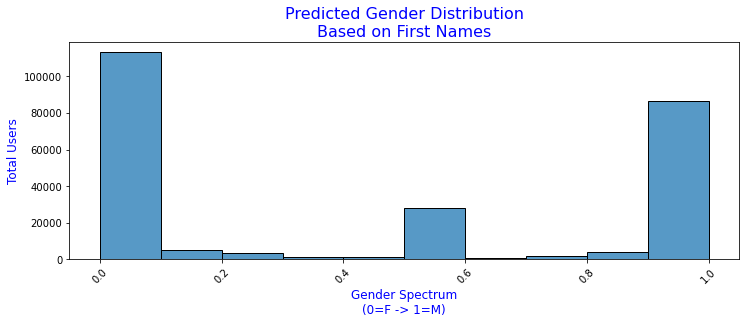

In [26]:
## Visualize gender distribution in philly users

fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data=philly_users, x='gender_score', bins=10)

plt.title('Predicted Gender Distribution\nBased on First Names', color='b', size=16)
ax.set_ylabel('Total Users', color='b', size=12)
ax.set_xlabel('Gender Spectrum\n(0=F -> 1=M)', color='b', size=12)

plt.xticks(rotation=45)

plt.show()